In [ ]:
# 修改国家统计局数据格式为面板数据
import pandas as pd
import os

def merge_excel_data_in_folder(folder_path, output_file_name, start_row, end_row, start_col, end_col, folder_path_out=None):
    """
    遍历指定文件夹中的所有Excel文件，对每个文件从指定的开始行列到结束行列的数据进行合并处理，
    然后将所有合并后的数据保存到指定文件夹下的新Excel文件中。

    参数:
    folder_path: 包含Excel文件的文件夹路径。
    output_file_name: 输出文件的名称。
    start_row: 数据开始的行号（从0开始计数）。
    end_row: 数据结束的行号。
    start_col: 数据开始的列标（如'A', 'B'等）。
    end_col: 数据结束的列标。
    folder_path_out: 输出文件的文件夹路径。如果为None，则使用输入文件的文件夹路径。
    """
    # 初始化一个空的DataFrame用于存放所有合并后的数据
    all_merged_data = pd.DataFrame()

    # 使用提供的输出文件夹路径，如果没有提供，则使用输入文件的文件夹路径
    if folder_path_out is None:
        folder_path_out = folder_path
    
    # 遍历文件夹中的所有文件
    for file_name in os.listdir(folder_path):
        # 构造完整的文件路径
        file_path = os.path.join(folder_path, file_name)
        # 确保是Excel文件
        if file_path.endswith('.xlsx'):
            # 读取指定范围的数据
            usecols = f"{start_col}:{end_col}"
            skiprows = start_row
            nrows = end_row - start_row + 1
            df = pd.read_excel(file_path, usecols=usecols, skiprows=skiprows, nrows=nrows)
            # 初始化一个空的列表用于存放合并后的数据
            merged_data = []
            # 从倒数第一列开始，逐列向前合并数据
            for column in reversed(df.columns):
                # 将当前列的数据添加到合并列表中
                merged_data.extend(df[column].dropna().values)
            # 将合并后的数据添加到总的DataFrame中
            all_merged_data = pd.concat([all_merged_data, pd.DataFrame(merged_data, columns=[file_name])], axis=1)

    # 定义新Excel文件的路径
    new_excel_path = os.path.join(folder_path_out, output_file_name)

    # 将合并后的数据保存到新的Excel文件中
    all_merged_data.to_excel(new_excel_path, index=False)

    print(f"合并后的数据已保存到 {new_excel_path}")

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl


plt.rcParams['font.family'] = 'SimHei'  # Or any other font you have
plt.rcParams['axes.unicode_minus'] = False  # This ensures that the minus sign in matplotlib plots uses the standard character and not the one specific to the font, which might not render correctly.


In [11]:
# Load the new uploaded Excel file to check its content and structure
# This time, assuming a more standard format given the re-upload
new_file_path = '...'
new_data = pd.read_excel(new_file_path)

# Display the first few rows of the dataframe to understand its structure
new_data.head()

,ID,省份,年份,域名数,IPV4个数,互联网接入端口数,移动电话普及率,单位面积长途光缆长度,信息化企业数,每百家企业拥有网站数,电子商务交易额（亿元）,有电子商务交易活动企业比重,软件业务收入（万元）,数字金融覆盖广度指数,数字金融使用深度指数,数字金融数字化程度,数字经济发展水平,得分,Unnamed: 18
0,1,Beijing,2011,106.1328,8459.2624,966.8,154.27,9.469524,371,57,5090.4302,2.526667,30704457.0,97.53,72.23,32.59,0.223360,68.934384,NaN
1,1,Beijing,2012,125.6000,8464.9992,1076.8,156.90,11.437771,420,58,8527.0898,6.320000,36765627.0,155.56,159.42,118.47,0.256520,70.260820,NaN
2,1,Beijing,2013,185.7000,8472.4024,1186.8,159.53,13.406018,410,59,12345.3000,7.500000,42106311.0,193.86,247.50,229.57,0.285414,71.416564,NaN
3,1,Beijing,2014,265.5000,8525.4576,1159.9,189.46,14.722246,397,60,16576.3010,12.600000,47965752.0,243.92,219.89,235.22,0.314627,72.585072,NaN
4,1,Beijing,2015,485.7000,8564.4256,1580.5,181.73,16.787991,402,63,20064.6000,17.100000,54228650.0,268.39,234.17,379.48,0.347816,73.912632,NaN


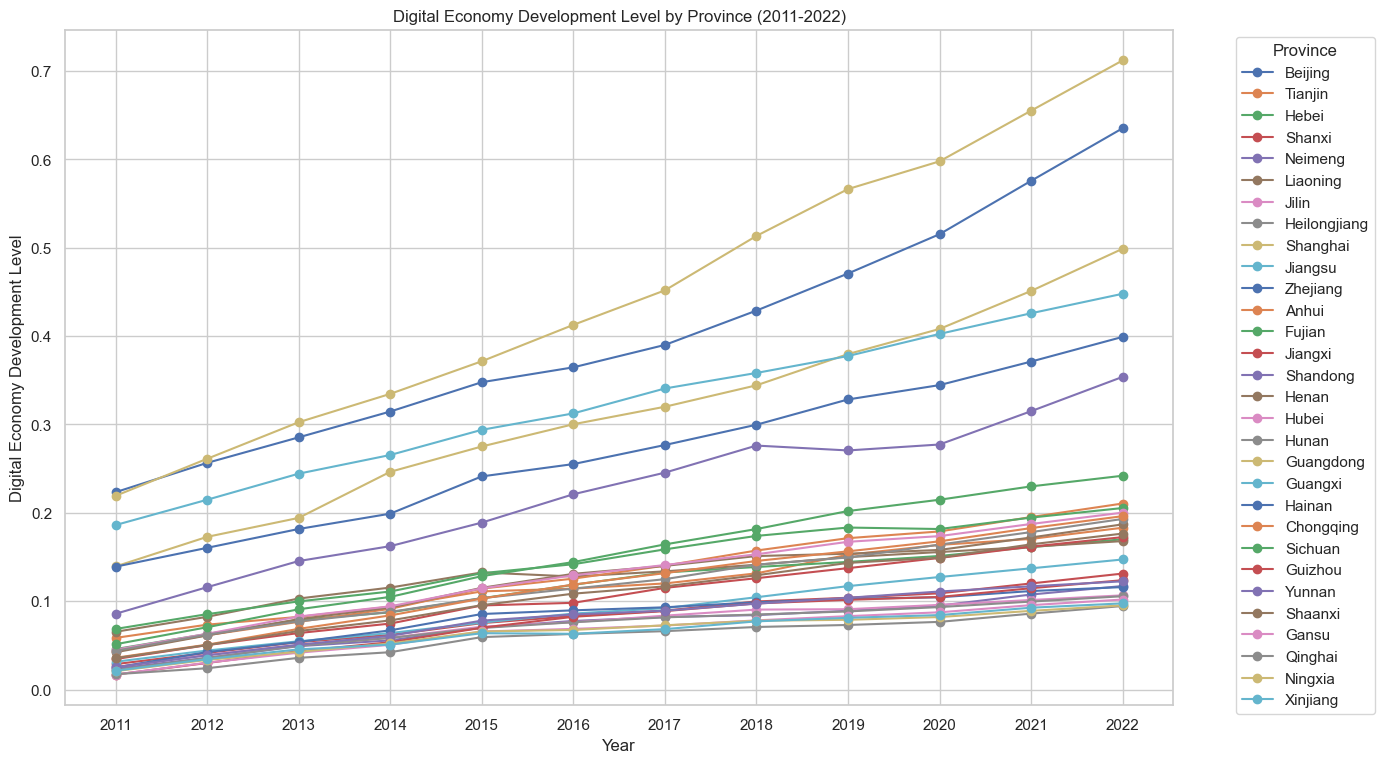

In [12]:
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Since the data seems to have multiple provinces and years, we'll plot a trend line for each province
plt.figure(figsize=(14, 8))

# Looping through each province to plot their digital economy development trend
for province in new_data['省份'].unique():
    province_data = new_data[new_data['省份'] == province]
    plt.plot(province_data['年份'], province_data['数字经济发展水平'], marker='o', label=province)

plt.title('Digital Economy Development Level by Province (2011-2022)')
plt.xlabel('Year')
plt.ylabel('Digital Economy Development Level')
plt.xticks(new_data['年份'].unique())
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


In [13]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [15]:
import plotly.express as px
import pandas as pd

# Assuming 'new_data' is your DataFrame

# Convert '年份' to string if it's not already, to ensure it's treated as a discrete category
new_data['年份'] = new_data['年份'].astype(str)

# Create an interactive line plot with Plotly Express
fig = px.line(new_data, x='年份', y='得分', color='省份',
              title='Digital Economy Development Level by Province (2011-2022)',
              labels={'年份': 'Year', '得分': 'Digital Economy Development Level', '省份': 'Province'})

# Improve layout
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Digital Economy Development Level',
                  legend_title='Province',
                  xaxis=dict(tickmode='linear'))

# Show plot
fig.show()
